In [24]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np


In [118]:

# function to plot subplots of 2 or any grid
def plot_images(images, rows, cols, labels = None, sizex = 20, sizey = 10):
    if len(images) < rows * cols and rows != 1:
        print("Number of images is less than the number of subplots. or rows = 1")
        return
    fig, axs = plt.subplots(rows, cols, figsize=(sizex, sizey))
    for row in range(rows):
        for col in range(cols):
            axs[row,col].imshow(images[row*cols+col])
            if labels:
                axs[row,col].set_title(labels[row*cols+col])
            else:
                axs[row,col].set_title(f"image_{row*cols+col}")
    plt.show()
def plot2(images, rows, cols, labels = None, sizex = 20, sizey = 10):
    if len(images) < rows * cols:
        print("Number of images is less than the number of subplots.")
        return
    fig, axs = plt.subplots(rows, cols, figsize=(sizex, sizey))
    for i in range(rows):
        for j in range(cols):
            axs[j].imshow(images[j], cmap = 'gray')
            if labels:
                axs[j].set_title(labels[j])
            else :
                axs[j].set_title(f"image_{j}")
    plt.show()







In [10]:
#let's see our images
san0 = cv2.imread('sanCityHall0.jpeg')
san1 = cv2.imread('sanCityHall1.jpeg')
san0 = cv2.cvtColor(san0, cv2.COLOR_BGR2RGB)
san1 = cv2.cvtColor(san1, cv2.COLOR_BGR2RGB)
print(san0.shape, san1.shape)



(240, 322, 3) (240, 349, 3)


In [35]:
copies = [np.copy(san0) for i in range(4)]

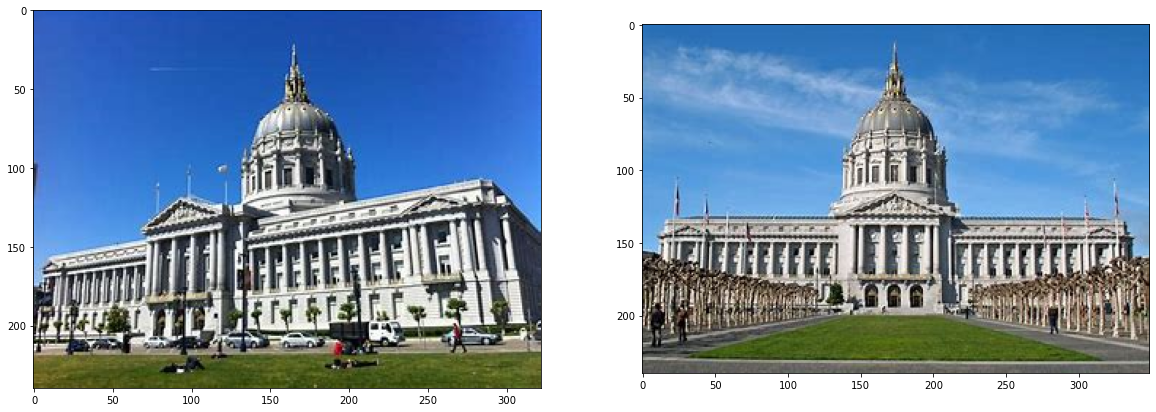

In [40]:
plot2([san0, san1], 1, 2)


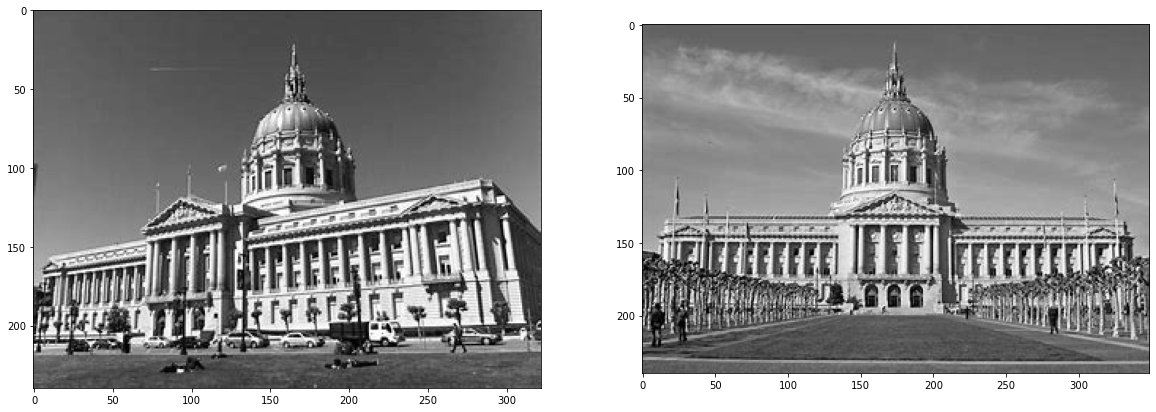

In [48]:
# let me make them gray
copy_gray = [cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in [san0,san1]]
plot2(copy_gray, 1, 2)

# create custome kernel 

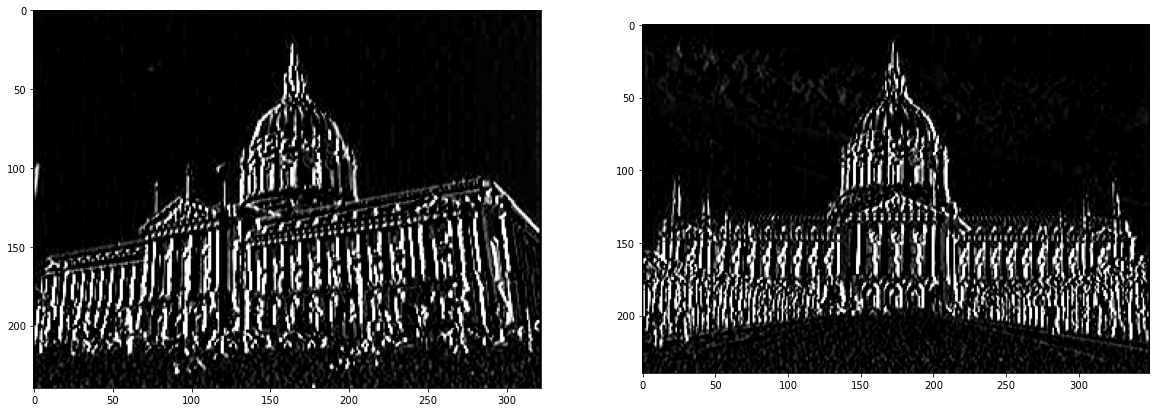

In [59]:
# sobole filter
soble_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
filtered_images = [cv2.filter2D(i, -1, soble_x) for i in copy_gray]
plot2(filtered_images, 1, 2)


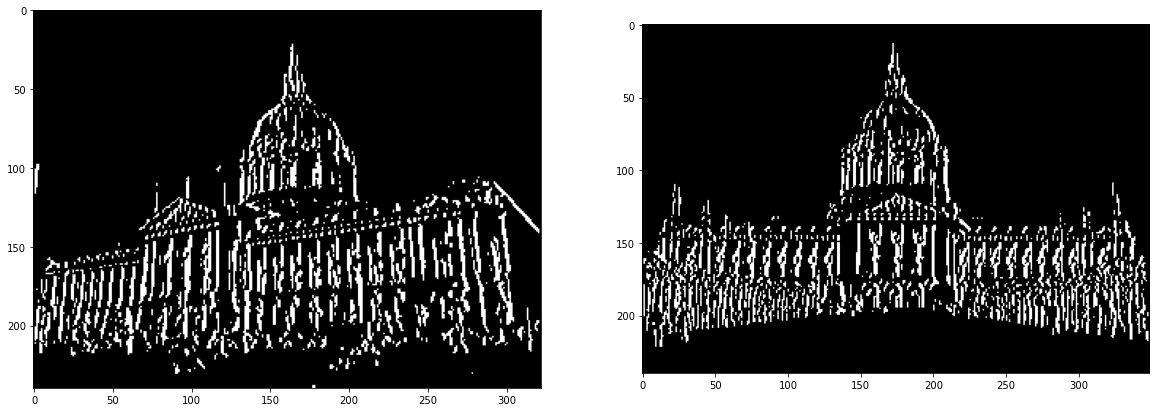

In [76]:
# create a threshold that sets all the filtered pixel to white
# above a certain threshold 
l, h = 120, 255
retval, binary_image = cv2.threshold(filtered_images[0], l, h,  cv2.THRESH_BINARY)
retval, binary_image2 = cv2.threshold(filtered_images[1], l, h,  cv2.THRESH_BINARY)
plot2([binary_image, binary_image2], 1, 2)

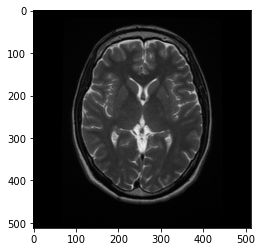

In [83]:
# let's try a new image 
brain = cv2.imread('brain_MR.jpg')
brain = cv2.cvtColor(brain, cv2.COLOR_BGR2RGB)
plt.imshow(brain);

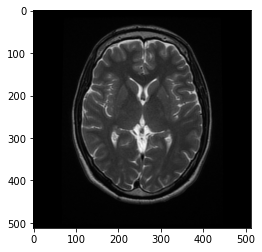

In [85]:
# applying a low pass filter to plur the image and reduce the noise
#1️⃣ gray scale
gray_brain = cv2.cvtColor(brain, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_brain, cmap='gray');

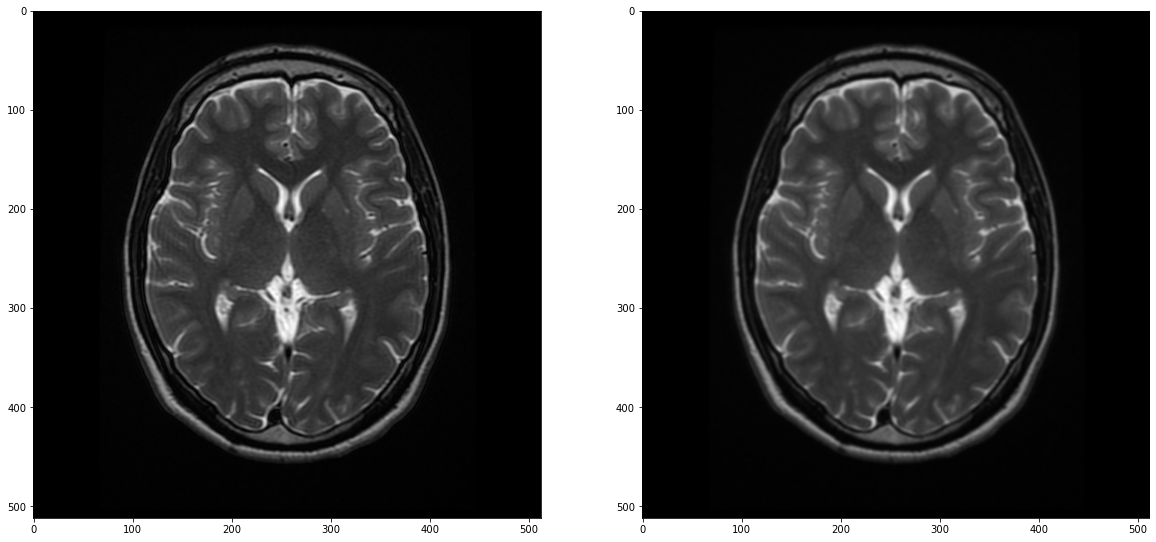

In [86]:
# 2️⃣ plur and guassian filter
gray_brain_plur = cv2.GaussianBlur(gray_brain, (5, 5), 0)
plot2([gray_brain, gray_brain_plur], 1, 2)

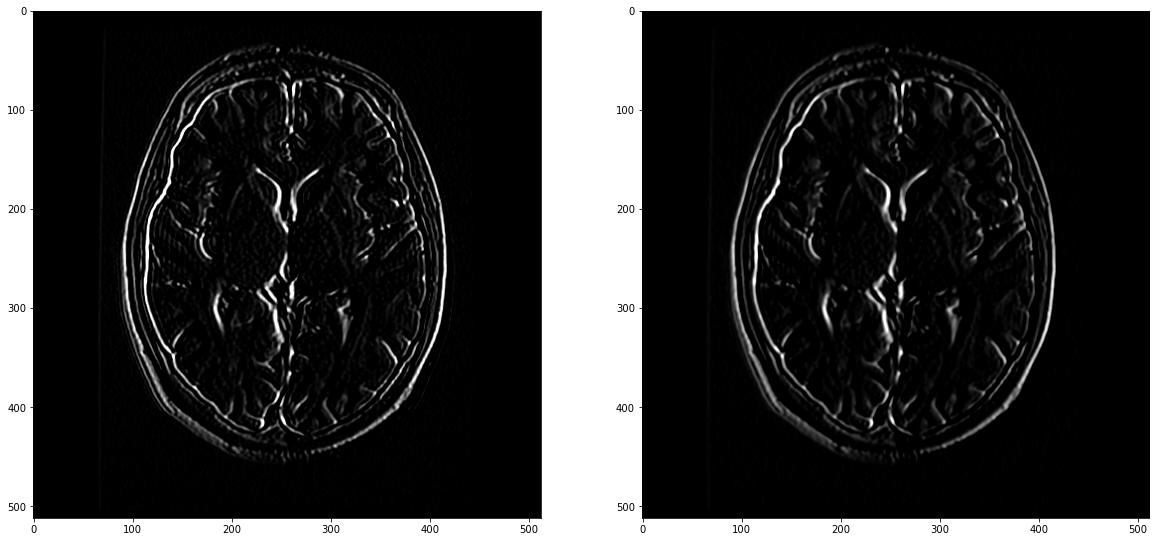

In [91]:
# applying sobel filter
filter_brain = cv2.filter2D(gray_brain, -1, soble_x)
filter_brain_plur = cv2.filter2D(gray_brain_plur, -1, soble_x)
plot2([filter_brain, filter_brain_plur], 1, 2)

on the left we see the un plured image of brain and alot of noise even inside the brain parts we probably are interested about 

noise like dots for example

# CANY EDGE DETECTION

**Canny edge detector:** The Canny edge detector is a multi-stage edge detection algorithm that uses the Sobel operator to calculate the gradient of the image intensity. It then applies non-maximum suppression to remove pixels that are not part of an edge, and applies **hysteresis thresholding** to determine which edges are strong, weak, or not an edge at all.

**hysteresis thresholding** is a double threshold upper and lower 
allow strong edges to pass throw the edges that is above the upper limit 
any edge belwo the lower limit would be considered as a weak and discarded

**What about between the two limits ?** it would just be kept only if they are conected to a strong edge

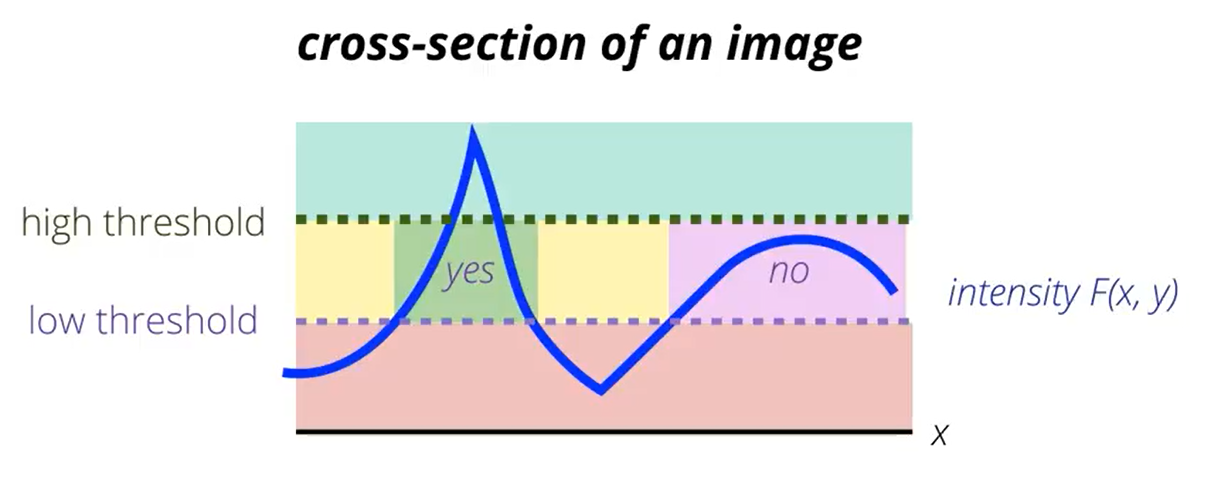

### other methods and termnolgies

There are several edge detection techniques that can be used, such as:

**Sobel operator:** The Sobel operator is a 3x3 filter that is convolved with the image to detect edges. It calculates the gradient of the image intensity at each pixel, and is sensitive to edges that are perpendicular to the direction of the gradient.

**Prewitt operator:** The Prewitt operator is similar to the Sobel operator and is also a 3x3 filter that is convolved with the image to detect edges. It calculates the gradient of the image intensity at each pixel and it is sensitive to edges that are perpendicular to the direction of the gradient.


**Laplacian of Gaussian (LoG):** The Laplacian of Gaussian (LoG) is a filter that is convolved with the image to detect edges. It uses a Gaussian filter to smooth the image, and then calculates the second derivative of the image intensity to detect edges.

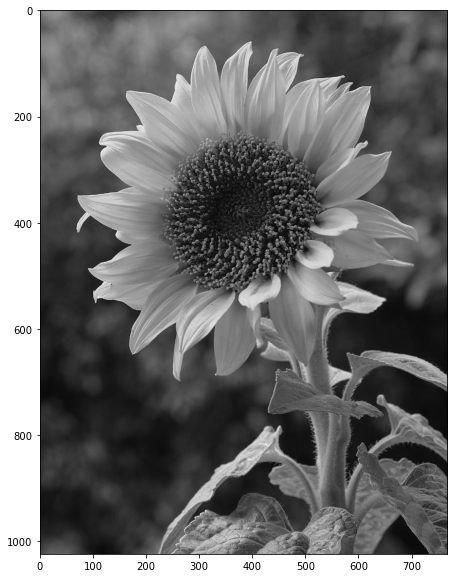

In [101]:
flow = cv2.imread('sunflower.jpg')
flow = cv2.cvtColor(flow,  cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15, 10))
plt.imshow(flow, cmap='gray');

## implementation of cany edge detection

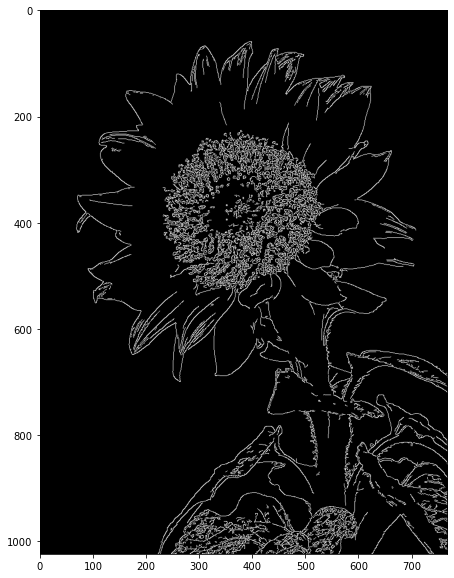

In [108]:
# define lower and upper thresholds for hysteresies
lower, upper = 120, 240
edgedFlow = cv2.Canny(flow, lower, upper)
plt.figure(figsize=(15, 10))
plt.imshow(edgedFlow, cmap='gray');

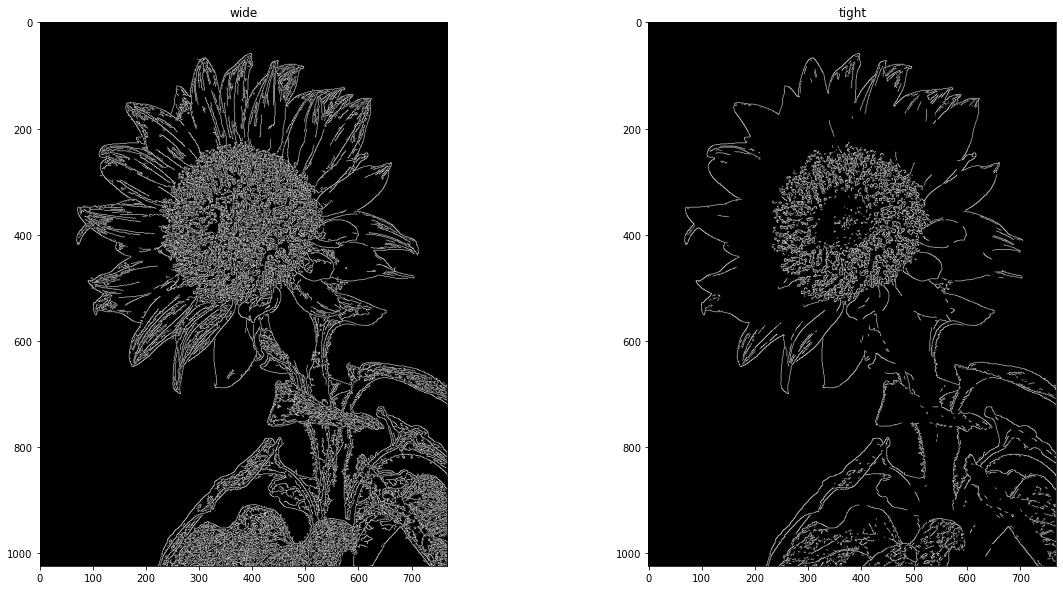

In [121]:
# trying using 'wide' and 'tight' thresholds
wide = cv2.Canny(flow, 30, 100)
tight = cv2.Canny(flow, 180, 240)
plot2([wide, tight], 1, 2, ['wide', 'tight'])